# <font color=red|green|black>Project-2 | Statistical Learning </font>

In [52]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Titan_df = pd.read_csv("data.csv")  
Titan_df.set_index("SALESPERSON", inplace=True)
Titan_df.head(1)

,Old Scheme (in thousands),New Scheme (in thousands)
SALESPERSON,,
1,57,62


** Data points are in thousand. To make the analysis easier with the data, all the data points were multiplied with thousands **

In [53]:
Titan_df = Titan_df*1000
Titan_df.rename(columns={'Old Scheme (in thousands)':'Old Scheme',
                          'New Scheme (in thousands)':'New Scheme',}, 
                 inplace=True)
Titan_df.head(1)

,Old Scheme,New Scheme
SALESPERSON,,
1,57000,62000


## Q1. Find the mean of old scheme and new scheme column (5 points)

In [54]:
print ("\033[94m\033[1mMean of Old Scheme :\x1b[0m", round(Titan_df["Old Scheme"].mean(),2))
print ("\033[94m\033[1mMean of New Scheme :\x1b[0m", round(Titan_df["New Scheme"].mean(),2))

Mean of Old Scheme : 68033.33
Mean of New Scheme : 72033.33


## Q2. Use the five percent significance test over the data to determine the p value to check new scheme has significantly raised outputs? (10 points)

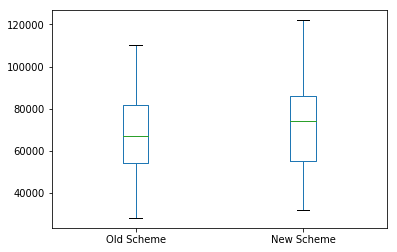

In [55]:
Titan_df[["Old Scheme","New Scheme"]].plot(kind='box')
plt.show()

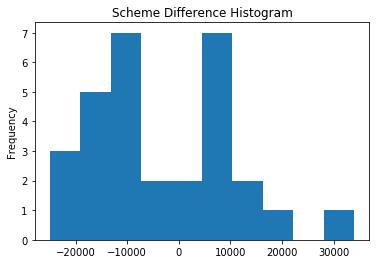

In [56]:
Titan_df['Scheme difference'] = Titan_df['Old Scheme'] - Titan_df['New Scheme']
Titan_df['Scheme difference'].plot(kind='hist', title= 'Scheme Difference Histogram')
plt.show()

In [57]:
t_statistic, p_value = stats.ttest_rel(Titan_df['Old Scheme'] , Titan_df['New Scheme'],axis=0)
print ("\033[94m\033[1mt_statistic :\x1b[0m", round(t_statistic,4))
print ("\033[94m\033[1mp_value     :\x1b[0m", round(p_value,4))

t_statistic : -1.5559
p_value     : 0.1306


**<font color=red|green|black>This is an one-tailed t-test problem.</font>** 

* $H_0$: $\mu{New Scheme}$ - $\mu{Old Scheme}$ =  0
* $H_A$: $\mu{New Scheme}$ - $\mu{Old Scheme}$ $\neq$  0

**<font color=red|green|black>p-value = 0.1306 whch is higher than 0.05, we accept NULL hypothesis($H_0$) or fail to reject NULL hypothesis($H_0$)</font>**  

## Q3. What conclusion does the test (p-value) lead to? (2.5 points)

**<font color=red|green|black>   There is  no sufficient evidence  to reject the null hypothesis. So we accept the null hypotheis and conclude that  the new scheme has NOT significantly raised the outputs</font>** 

## Q4. Suppose it has been calculated that in order for Titan to break even, the average output must increase by £5000 in the scheme compared to the old scheme. If this figure is alternative hypothesis, what is:
**a)The probability of a type 1 error? (2.5 points)**

**<font color=red|green|black> Probability of a type 1 error = significant level. In this problem, we have considered 0.05 or 5% as our significant test level.
hence, probability of a type 1 error = 5% or 0.05</font>**  

** b) What is the p- value of the hypothesis test if we test for a difference of $5000? (10 points) **

**<font color=red|green|black>This is a right tail t-test problem.</font>** 

* $H_0$: $\mu{New Scheme}$ - $\mu{Old Scheme}$ ≤  5000
* $H_A$: $\mu{New Scheme}$ - $\mu{Old Scheme}$ > 5000 

In [58]:
d =  np.array(Titan_df["New Scheme"] - Titan_df["Old Scheme"])
t_statistic, p_value = stats.ttest_1samp(d, 5000)
print ("\033[94m\033[1mt_statistic :\x1b[0m", round(t_statistic,4))
print ("\033[94m\033[1mp- value of the hypothesis test if we test for a difference of $5000:\x1b[0m", round(p_value,4))

t_statistic : -0.389
p- value of the hypothesis test if we test for a difference of $5000: 0.7001


**c) Power of the test (5 points)**

**<font color=red|green|black> Power of the test = 1 - Probability of Type 2 Error</font>** 

In [59]:
n = len(d)
S = np.std(list(d))
se = S/np.sqrt(n)
mu0 = 0
print ("\033[94m\033[1mt critical value :\x1b[0m", round(stats.t.isf(0.05,  scale = se , df = n-1),2))
print ("\033[94m\033[1mH0 will be rejected if x_bar >= \x1b[0m", round(stats.t.isf(0.05,  scale = se , df = n-1),2))


t critical value : 4294.76
H0 will be rejected if x_bar >=  4294.76


Probability (type II error) is P(Do not reject H0 | H0 is false).
Our H0 is TRUE at μd = 0 so that 
* $H_0$: $\mu{New Scheme}$ - $\mu{Old Scheme}$ =  0
* $H_A$: $\mu{New Scheme}$ - $\mu{Old Scheme}$ >  0

Probability of type II error at  μNewScheme  -  μOldScheme  = 5000

    = P (Do not reject H0 | H0 is false)
    
    = P (x_bar < 4294.76 | μNewScheme  -  μOldScheme  = 5000)

In [60]:
x_bar = stats.t.isf(0.05,  scale = se , df = n-1)
t_statistic = (x_bar - 5000)/se
print("\033[94m\033[1mProbability of Type 2 Error:\x1b[0m", round(stats.t.cdf(t_statistic,  df = n-1),4))
print("\033[94m\033[1mPower of test = 1- Probability of Type 2 Error=\x1b[0m", round(1-stats.t.cdf(t_statistic,  df = n-1),4))

Probability of Type 2 Error: 0.3911
Power of test = 1- Probability of Type 2 Error= 0.6089


**<font color=red|green|black> Power of the test = 0.6089</font>** 